## Trinucleotide abundance in genes

This notebook was used to calculate and plot Supplementary Figure 11A.
Vakil Takhaveev and Jasmina Kubitschek, 2024

In [1]:
#importing necessary modules
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy
import sys
import math
import pyfaidx
from pyfaidx import Fasta


print(sys.version)

from itertools import product

3.11.6 (main, Jun  7 2024, 07:09:59) [GCC 13.2.0]


In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['mathtext.default'] = "regular"

matplotlib.rcParams['font.size'] = 16

In [3]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("scipy", scipy.__version__)
print("pyfaidx", pyfaidx.__version__)

numpy 1.26.4
pandas 2.2.2
matplotlib 3.9.0
seaborn 0.13.2
scipy 1.13.1
pyfaidx 0.8.1.2


In [4]:
# path to gene annotation folder
input_path = '/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/O6meG_revision/gene_annotation/'

In [5]:
# folder paths for output
path = '/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/O6meG_revision/Plotting/'
data_path = path + 'Source_data/gene_annotated_data/'
graph_path = path + 'Graphs/Supplementary_figures/'

## Relating the damage level at specific trinucleotides to gene expression

In [6]:
### Trinucleotide counts in the reference genome^
df = pd.read_csv(input_path + 'G_trinucleotide_contexts/' + "knownGenes_canonTr_1nt_beyond_G_triplet_counts.bed", index_col = None, sep = "\t")
df = df.drop(["0", "1", "2", "4", "5"], axis = 1)
df = df.rename(columns = {"3" : "Gene"})
print("All genes:", df.shape[0])
df = df.replace(0, pd.NA).dropna()
print("Genes that have all trinucleotides on both strands")
df

All genes: 16293
Genes that have all trinucleotides on both strands


Gene  TGT_sense TGT_antisense GGT_sense  GGT_antisense  \
0      ENSG00000000460       1372          1001       678            609   
1      ENSG00000001461       1122          1056       783            731   
2      ENSG00000007933        550           519       303            240   
3      ENSG00000008118        519           615       382            430   
4      ENSG00000009709       2155          1892      1703           1654   
...                ...        ...           ...       ...            ...   
16288  ENSG00000250479         34            22        32             49   
16289  ENSG00000274252         24            27        47             36   
16290  ENSG00000275793         77            81        73            117   
16291  ENSG00000278195        123            89       146            111   
16292  ENSG00000284194         31            25        59             32   

      CGT_sense CGT_antisense AGT_sense  AGT_antisense  TGG_sense  ...  \
0           146           113      1131            990        953  ...   
1           193           157       940            846       1269  ...   
2            56            49       462            412        450  ...   
3            76            65       496            470        637  ...   
4           461           417      1613           1472       2964  ...   
...         ...           ...       ...            ...        ...  ...   
16288        10             6        27             28         44  ...   
16289         5            17        20             20         71  ...   
16290        33            34        76             52        157  ...   
16291        44            37        73             82        273  ...   
16292        28            26        27             23         89  ...   

       AGC_sense  AGC_antisense TGA_sense TGA_antisense GGA_sense  \
0            722            795      1168          1168       679   
1            983            942      1160          1069      1039   
2            320            316       572           491       349   
3            579            491       582           594       596   
4           2225           2182      2010          1969      2856   
...          ...            ...       ...           ...       ...   
16288         53             41        33            25        45   
16289         33             42        33            34        40   
16290        177            167        80            76       161   
16291        163            190       129           151       232   
16292         71            100        38            31        76   

      GGA_antisense CGA_sense  CGA_antisense  AGA_sense  AGA_antisense  
0               792        97            131       1139           1398  
1               946       136            155       1256           1158  
2               394        43             47        605            594  
3               595        63             58        741            691  
4              2555       434            428       2635           2398  
...             ...       ...            ...        ...            ...  
16288            43        11             14         34             28  
16289            42         7             10         27             35  
16290           128        53             36        121             66  
16291           195        29             30        148            201  
16292            54        20             35         33             31  

[16081 rows x 33 columns]

In [7]:
gene_trinucl_ref_genome = pd.DataFrame({})

triplet_columns = list(df.columns[1:])
print(len(triplet_columns)) #should be 32 for 16 triplets x2 (sense and anti)

for col in triplet_columns:
    trinucleotide = col.split("_")[0]
    strand = col.split("_")[1]
    
    tmp = df.loc[:, ["Gene", col]]
    tmp = tmp.rename(columns = {col : "Trinucleotide_count_in_ref_genome"})
    tmp.loc[:, "Trinucleotide"] = trinucleotide
    tmp.loc[:, "Strand"] = strand
    gene_trinucl_ref_genome = pd.concat([gene_trinucl_ref_genome, tmp])
    
gene_trinucl_ref_genome = gene_trinucl_ref_genome.reset_index(drop = True)
gene_trinucl_ref_genome

32


Gene Trinucleotide_count_in_ref_genome Trinucleotide  \
0       ENSG00000000460                              1372           TGT   
1       ENSG00000001461                              1122           TGT   
2       ENSG00000007933                               550           TGT   
3       ENSG00000008118                               519           TGT   
4       ENSG00000009709                              2155           TGT   
...                 ...                               ...           ...   
514587  ENSG00000250479                                28           AGA   
514588  ENSG00000274252                                35           AGA   
514589  ENSG00000275793                                66           AGA   
514590  ENSG00000278195                               201           AGA   
514591  ENSG00000284194                                31           AGA   

           Strand  
0           sense  
1           sense  
2           sense  
3           sense  
4           sense  
...           ...  
514587  antisense  
514588  antisense  
514589  antisense  
514590  antisense  
514591  antisense  

[514592 rows x 4 columns]

In [8]:
gene_tri_counts = gene_trinucl_ref_genome.loc[:, ["Trinucleotide_count_in_ref_genome", "Trinucleotide", "Strand"]].copy()
gene_tri_counts = gene_tri_counts.groupby(by = ["Trinucleotide", "Strand"]).sum().reset_index()
'''.sort_values(by = "Trinucleotide_count_in_ref_genome", ascending = False).reset_index(drop = True)
trinucleotide_list_desc = DF_tri_counts["Trinucleotide"].tolist()'''
gene_tri_counts

Trinucleotide     Strand Trinucleotide_count_in_ref_genome
0            AGA  antisense                          21962571
1            AGA      sense                          20232726
2            AGC  antisense                          14535296
3            AGC      sense                          13772351
4            AGG  antisense                          18273016
5            AGG      sense                          17677636
6            AGT  antisense                          14979045
7            AGT      sense                          16554893
8            CGA  antisense                           2466605
9            CGA      sense                           2310174
10           CGC  antisense                           2838403
11           CGC      sense                           2710181
12           CGG  antisense                           3219364
13           CGG      sense                           3161857
14           CGT  antisense                           2535641
15           CGT      sense                           2880532
16           GGA  antisense                          15199657
17           GGA      sense                          15376779
18           GGC  antisense                          12630905
19           GGC      sense                          12557863
20           GGG  antisense                          13404579
21           GGG      sense                          13976482
22           GGT  antisense                          11047099
23           GGT      sense                          12272743
24           TGA  antisense                          18278834
25           TGA      sense                          19307429
26           TGC  antisense                          13832265
27           TGC      sense                          14796533
28           TGG  antisense                          17385876
29           TGG      sense                          19367421
30           TGT  antisense                          17100280
31           TGT      sense                          21569834

In [9]:
gene_tri_counts_sense = gene_tri_counts[gene_tri_counts.Strand == 'sense'].copy()
gene_tri_counts_sense['rel_counts'] = gene_tri_counts_sense['Trinucleotide_count_in_ref_genome']/gene_tri_counts_sense['Trinucleotide_count_in_ref_genome'].sum()*100
print(gene_tri_counts_sense.rel_counts.sum())
gene_tri_counts_sense

100.0


Trinucleotide Strand Trinucleotide_count_in_ref_genome rel_counts
1            AGA  sense                          20232726   9.702762
3            AGC  sense                          13772351   6.604638
5            AGG  sense                          17677636   8.477448
7            AGT  sense                          16554893   7.939028
9            CGA  sense                           2310174   1.107862
11           CGC  sense                           2710181   1.299688
13           CGG  sense                           3161857   1.516293
15           CGT  sense                           2880532   1.381382
17           GGA  sense                          15376779   7.374054
19           GGC  sense                          12557863   6.022221
21           GGG  sense                          13976482   6.702531
23           GGT  sense                          12272743    5.88549
25           TGA  sense                          19307429   9.259028
27           TGC  sense                          14796533   7.095793
29           TGG  sense                          19367421   9.287798
31           TGT  sense                          21569834  10.343982

In [10]:
gene_tri_counts_anti = gene_tri_counts[gene_tri_counts.Strand == 'antisense'].copy()
gene_tri_counts_anti['rel_counts'] = gene_tri_counts_anti['Trinucleotide_count_in_ref_genome']/gene_tri_counts_anti['Trinucleotide_count_in_ref_genome'].sum()*100
print(gene_tri_counts_anti.rel_counts.sum())
gene_tri_counts_anti

100.0


Trinucleotide     Strand Trinucleotide_count_in_ref_genome rel_counts
0            AGA  antisense                          21962571  10.998364
2            AGC  antisense                          14535296   7.278951
4            AGG  antisense                          18273016   9.150717
6            AGT  antisense                          14979045    7.50117
8            CGA  antisense                           2466605   1.235221
10           CGC  antisense                           2838403   1.421409
12           CGG  antisense                           3219364   1.612185
14           CGT  antisense                           2535641   1.269792
16           GGA  antisense                          15199657   7.611648
18           GGC  antisense                          12630905   6.325275
20           GGG  antisense                          13404579   6.712713
22           GGT  antisense                          11047099    5.53214
24           TGA  antisense                          18278834   9.153631
26           TGC  antisense                          13832265   6.926889
28           TGG  antisense                          17385876   8.706458
30           TGT  antisense                          17100280   8.563437

In [11]:
gene_counts = pd.concat([gene_tri_counts_sense, gene_tri_counts_anti])
gene_counts

Trinucleotide     Strand Trinucleotide_count_in_ref_genome rel_counts
1            AGA      sense                          20232726   9.702762
3            AGC      sense                          13772351   6.604638
5            AGG      sense                          17677636   8.477448
7            AGT      sense                          16554893   7.939028
9            CGA      sense                           2310174   1.107862
11           CGC      sense                           2710181   1.299688
13           CGG      sense                           3161857   1.516293
15           CGT      sense                           2880532   1.381382
17           GGA      sense                          15376779   7.374054
19           GGC      sense                          12557863   6.022221
21           GGG      sense                          13976482   6.702531
23           GGT      sense                          12272743    5.88549
25           TGA      sense                          19307429   9.259028
27           TGC      sense                          14796533   7.095793
29           TGG      sense                          19367421   9.287798
31           TGT      sense                          21569834  10.343982
0            AGA  antisense                          21962571  10.998364
2            AGC  antisense                          14535296   7.278951
4            AGG  antisense                          18273016   9.150717
6            AGT  antisense                          14979045    7.50117
8            CGA  antisense                           2466605   1.235221
10           CGC  antisense                           2838403   1.421409
12           CGG  antisense                           3219364   1.612185
14           CGT  antisense                           2535641   1.269792
16           GGA  antisense                          15199657   7.611648
18           GGC  antisense                          12630905   6.325275
20           GGG  antisense                          13404579   6.712713
22           GGT  antisense                          11047099    5.53214
24           TGA  antisense                          18278834   9.153631
26           TGC  antisense                          13832265   6.926889
28           TGG  antisense                          17385876   8.706458
30           TGT  antisense                          17100280   8.563437

In [12]:
genomic_triplets_file = '/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/O6meG_revision/Plotting/Source_data/Trinucleotide_counts_genome_GRCh38.csv'
genomic_all_triplets = pd.read_csv(genomic_triplets_file, index_col = 0)
genomic_all_triplets = genomic_all_triplets[genomic_all_triplets['index'].str.contains('.G.', regex=True)].copy()
genomic_all_triplets

index      Count
48   TGT  118760461
49   TGC   84562100
50   TGA  115403897
51   TGG  107708924
52   CGT   15101133
53   CGC   14062069
54   CGA   13203701
55   CGG   16240996
56   AGT   94721476
57   AGC   81703215
58   AGA  130684199
59   AGG  103589601
60   GGT   67609154
61   GGC   69024487
62   GGA   90905860
63   GGG   76256002

In [13]:
genomic_all_triplets['rel_genomic_counts'] = genomic_all_triplets['Count']/genomic_all_triplets['Count'].sum()*100
print(genomic_all_triplets.rel_genomic_counts.sum())
genomic_all_triplets

100.0


index      Count  rel_genomic_counts
48   TGT  118760461            9.900523
49   TGC   84562100            7.049560
50   TGA  115403897            9.620701
51   TGG  107708924            8.979206
52   CGT   15101133            1.258913
53   CGC   14062069            1.172291
54   CGA   13203701            1.100733
55   CGG   16240996            1.353938
56   AGT   94721476            7.896501
57   AGC   81703215            6.811228
58   AGA  130684199           10.894551
59   AGG  103589601            8.635797
60   GGT   67609154            5.636270
61   GGC   69024487            5.754259
62   GGA   90905860            7.578411
63   GGG   76256002            6.357118

In [14]:
triplet_order = ['AGA','TGT', 'TGA', 'TGG',
                 'AGG', 'AGT', 'GGA', 'TGC',
                 'AGC', 'GGG', 'GGC', 'GGT',
                 'CGG', 'CGC', 'CGT', 'CGA']

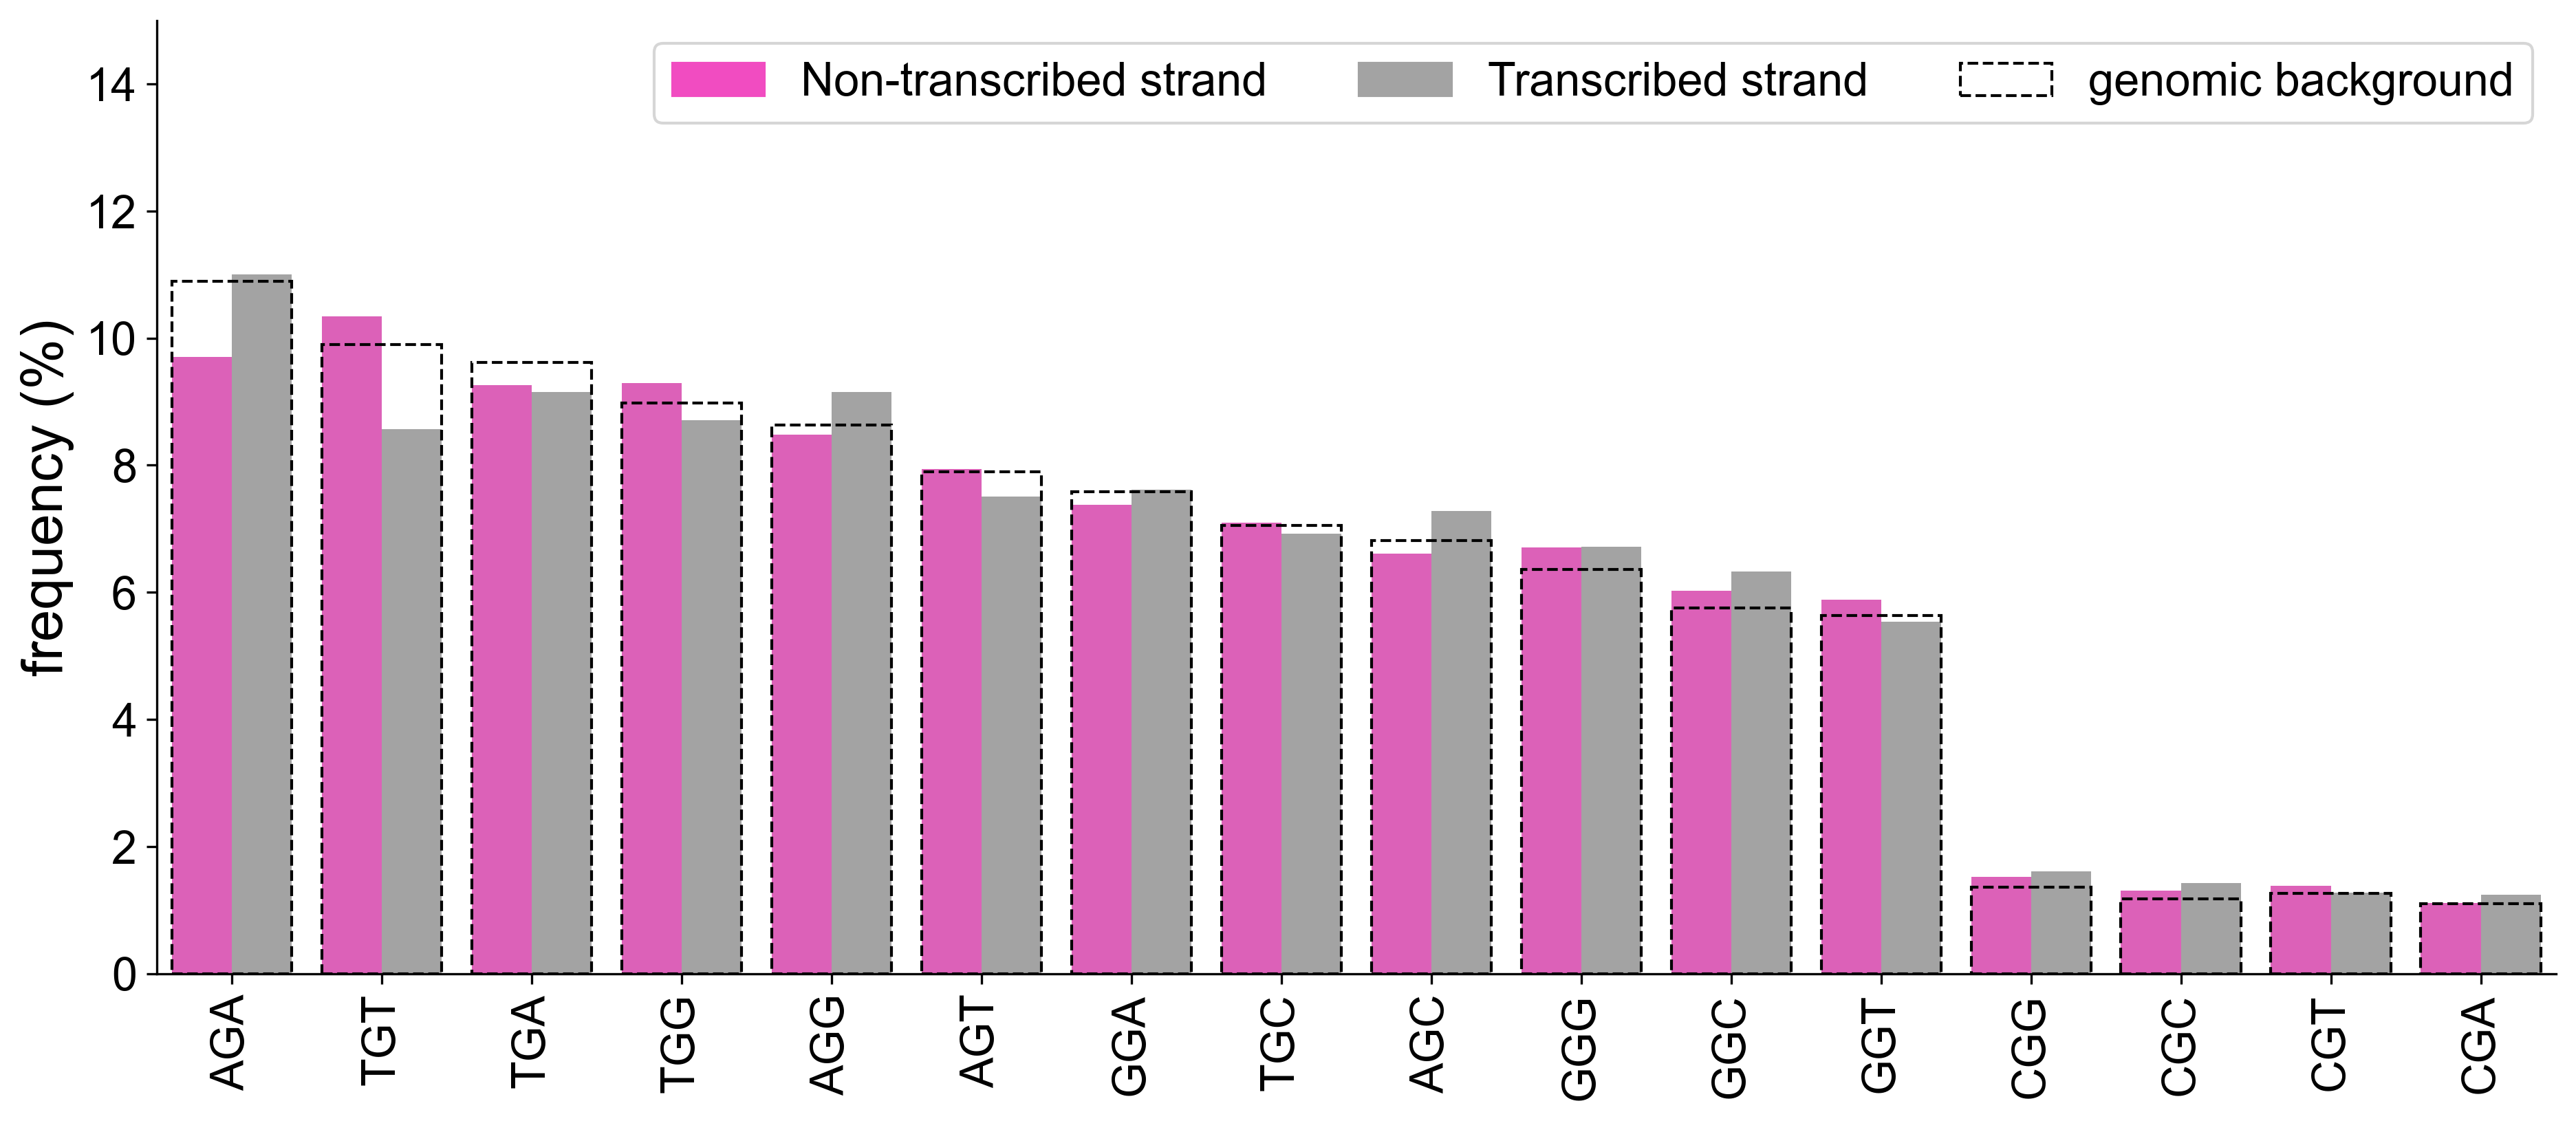

In [15]:
# Create the figure and axis
f, ax = plt.subplots(figsize=(15,6), dpi=300)

# Plot the barplot with samples averaged by conditions
sns.barplot(
    data=gene_counts, 
    x='Trinucleotide', order = triplet_order,
    y='rel_counts', 
    hue='Strand', 
    errorbar=None, 
    palette=[sns.color_palette("bright")[6], sns.color_palette("bright")[7]], 
    capsize=0.1, 
    err_kws={'color': 'black'}
)

# Plot the barplot for the genome background
sns.barplot(
    data=genomic_all_triplets, 
    x='index', order = triplet_order,
    y='rel_genomic_counts', 
    fill=False, 
    linestyle="dashed",
    linewidth=1,
    color='black', 
    label="Genome background"
)

# Customize the plot
sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylabel('frequency (%)', fontsize=20)
ax.set_xlabel('')
ax.set_ylim(0, 15)

# make legend
dashed = mpatches.Patch(fill=False, linestyle = "dashed", label='genomic background')

violet = mpatches.Patch(color=sns.color_palette("bright")[6], label='Non-transcribed strand')
grey = mpatches.Patch(color=sns.color_palette("bright")[7], label='Transcribed strand')


ax.legend(handles=[violet, grey, dashed], 
          ncol=7, loc='upper right')

plt.savefig(graph_path + 'triplets_all_genes.png', bbox_inches='tight')

## Compare with highly expressed genes

In [16]:
def bounds_of_groups(DATA1, perc_list):
    #perc_list - sorted increasing list of upper-border percentiles
    
    tmp = DATA1.loc[DATA1["Expression_level"] != 0, ["Gene", "Expression_level"]].copy().drop_duplicates()
    expr_array = np.array(tmp["Expression_level"])
    #print(len(expr_array))
    
    if np.max(expr_array) != np.percentile(expr_array, 100):
        print("Warning!")
    
    bounds = [(-1, 0)]
    prev_value = 0
    
    for p in perc_list:
        p_value = np.percentile(expr_array, p)
        
        bounds.append((prev_value, p_value))
        prev_value = p_value
    
    bins = pd.IntervalIndex.from_tuples(bounds)
    return(bins)
    

In [17]:
Gene_groups = pd.read_csv(data_path + "average_norm_data_prot_coding_genes.csv", index_col = 0)
Gene_groups = Gene_groups.loc[:, ["Gene", "Expression_level"]].drop_duplicates().reset_index(drop = True)
print(Gene_groups.shape[0])

groups = ['unexpr', '≤ 10%', '≤ 20%', '≤ 30%', '≤ 40%', '≤ 50%', '≤ 60%', '≤ 70%', '≤ 80%', '≤ 90%', '≤ 100%']
perc_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

bins = bounds_of_groups(Gene_groups, perc_list)
d = dict(zip(bins, groups))
print(d)
Gene_groups.loc[:, "Group"] = pd.cut(Gene_groups["Expression_level"], bins, include_lowest = True).map(d)

Gene_groups.groupby(by = ["Group"]).size().reset_index()
Gene_groups

16293
{Interval(-1.0, 0.0, closed='right'): 'unexpr', Interval(0.0, 0.0840642647884745, closed='right'): '≤ 10%', Interval(0.0840642647884745, 0.4329594072761063, closed='right'): '≤ 20%', Interval(0.4329594072761063, 1.6182386555954549, closed='right'): '≤ 30%', Interval(1.6182386555954549, 2.835519674737333, closed='right'): '≤ 40%', Interval(2.835519674737333, 3.6229303509201767, closed='right'): '≤ 50%', Interval(3.6229303509201767, 4.238175386177999, closed='right'): '≤ 60%', Interval(4.238175386177999, 4.840463233869542, closed='right'): '≤ 70%', Interval(4.840463233869542, 5.491083445159572, closed='right'): '≤ 80%', Interval(5.491083445159572, 6.466757562599958, closed='right'): '≤ 90%', Interval(6.466757562599958, 13.099199850954731, closed='right'): '≤ 100%'}


/scratch/tmp.12618498.jabueche/ipykernel_378229/3668033282.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Gene_groups.groupby(by = ["Group"]).size().reset_index()


Gene  Expression_level   Group
0      ENSG00000000460          5.012122   ≤ 80%
1      ENSG00000001461          4.952334   ≤ 80%
2      ENSG00000007933          0.000000  unexpr
3      ENSG00000008118          0.137504   ≤ 20%
4      ENSG00000009709          0.000000  unexpr
...                ...               ...     ...
16288  ENSG00000278057          0.000000  unexpr
16289  ENSG00000278085          0.000000  unexpr
16290  ENSG00000278289          0.000000  unexpr
16291  ENSG00000283093          0.000000  unexpr
16292  ENSG00000283697          0.042644   ≤ 10%

[16293 rows x 3 columns]

In [18]:
gene_trinucl_ref_genome_expr = pd.merge(gene_trinucl_ref_genome, Gene_groups, on='Gene')
gene_trinucl_ref_genome_expr

Gene Trinucleotide_count_in_ref_genome Trinucleotide  \
0       ENSG00000000460                              1372           TGT   
1       ENSG00000001461                              1122           TGT   
2       ENSG00000007933                               550           TGT   
3       ENSG00000008118                               519           TGT   
4       ENSG00000009709                              2155           TGT   
...                 ...                               ...           ...   
514587  ENSG00000250479                                28           AGA   
514588  ENSG00000274252                                35           AGA   
514589  ENSG00000275793                                66           AGA   
514590  ENSG00000278195                               201           AGA   
514591  ENSG00000284194                                31           AGA   

           Strand  Expression_level   Group  
0           sense          5.012122   ≤ 80%  
1           sense          4.952334   ≤ 80%  
2           sense          0.000000  unexpr  
3           sense          0.137504   ≤ 20%  
4           sense          0.000000  unexpr  
...           ...               ...     ...  
514587  antisense          3.565597   ≤ 50%  
514588  antisense          0.000000  unexpr  
514589  antisense          0.378512   ≤ 20%  
514590  antisense          0.014355   ≤ 10%  
514591  antisense          4.618826   ≤ 70%  

[514592 rows x 6 columns]

In [19]:
gene_trinucl_ref_genome_high_expr = gene_trinucl_ref_genome_expr[gene_trinucl_ref_genome_expr['Group'].isin({'≤ 70%', '≤ 80%', '≤ 90%', '≤ 100%'})]
gene_trinucl_ref_genome_high_expr

Gene Trinucleotide_count_in_ref_genome Trinucleotide  \
0       ENSG00000000460                              1372           TGT   
1       ENSG00000001461                              1122           TGT   
9       ENSG00000011009                                76           TGT   
14      ENSG00000020129                               151           TGT   
16      ENSG00000025800                              1398           TGT   
...                 ...                               ...           ...   
514582  ENSG00000242247                              1206           AGA   
514583  ENSG00000242259                               115           AGA   
514584  ENSG00000243156                              5258           AGA   
514585  ENSG00000244486                               209           AGA   
514591  ENSG00000284194                                31           AGA   

           Strand  Expression_level   Group  
0           sense          5.012122   ≤ 80%  
1           sense          4.952334   ≤ 80%  
9           sense          5.903279   ≤ 90%  
14          sense          4.841973   ≤ 80%  
16          sense          4.715344   ≤ 70%  
...           ...               ...     ...  
514582  antisense          5.543805   ≤ 90%  
514583  antisense          4.469235   ≤ 70%  
514584  antisense          6.534653  ≤ 100%  
514585  antisense          4.826294   ≤ 70%  
514591  antisense          4.618826   ≤ 70%  

[176672 rows x 6 columns]

In [20]:
high_gene_tri_counts = gene_trinucl_ref_genome_high_expr.loc[:, ["Trinucleotide_count_in_ref_genome", "Trinucleotide", "Strand"]].copy()
high_gene_tri_counts = high_gene_tri_counts.groupby(by = ["Trinucleotide", "Strand"]).sum().reset_index()
high_gene_tri_counts

Trinucleotide     Strand Trinucleotide_count_in_ref_genome
0            AGA  antisense                           6051597
1            AGA      sense                           5488948
2            AGC  antisense                           4225481
3            AGC      sense                           3946111
4            AGG  antisense                           5281977
5            AGG      sense                           5033846
6            AGT  antisense                           4162793
7            AGT      sense                           4766503
8            CGA  antisense                            775849
9            CGA      sense                            713408
10           CGC  antisense                            941791
11           CGC      sense                            887539
12           CGG  antisense                           1048551
13           CGG      sense                           1032407
14           CGT  antisense                            762972
15           CGT      sense                            897032
16           GGA  antisense                           4244358
17           GGA      sense                           4322346
18           GGC  antisense                           3815556
19           GGC      sense                           3778289
20           GGG  antisense                           3863460
21           GGG      sense                           4076369
22           GGT  antisense                           3124944
23           GGT      sense                           3588337
24           TGA  antisense                           4970340
25           TGA      sense                           5380978
26           TGC  antisense                           3854982
27           TGC      sense                           4225886
28           TGG  antisense                           4854602
29           TGG      sense                           5622512
30           TGT  antisense                           4498160
31           TGT      sense                           6147467

In [21]:
gene_tri_counts_sense = high_gene_tri_counts[high_gene_tri_counts.Strand == 'sense'].copy()
gene_tri_counts_sense['rel_counts'] = gene_tri_counts_sense['Trinucleotide_count_in_ref_genome']/gene_tri_counts_sense['Trinucleotide_count_in_ref_genome'].sum()*100
print(gene_tri_counts_sense.rel_counts.sum())
gene_tri_counts_sense

100.0


Trinucleotide Strand Trinucleotide_count_in_ref_genome rel_counts
1            AGA  sense                           5488948   9.162299
3            AGC  sense                           3946111   6.586954
5            AGG  sense                           5033846    8.40263
7            AGT  sense                           4766503   7.956374
9            CGA  sense                            713408    1.19084
11           CGC  sense                            887539   1.481504
13           CGG  sense                           1032407   1.723321
15           CGT  sense                            897032    1.49735
17           GGA  sense                           4322346   7.214976
19           GGC  sense                           3778289   6.306821
21           GGG  sense                           4076369   6.804384
23           GGT  sense                           3588337   5.989748
25           TGA  sense                           5380978   8.982072
27           TGC  sense                           4225886   7.053962
29           TGG  sense                           5622512   9.385247
31           TGT  sense                           6147467  10.261516

In [22]:
gene_tri_counts_anti = high_gene_tri_counts[high_gene_tri_counts.Strand == 'antisense'].copy()
gene_tri_counts_anti['rel_counts'] = gene_tri_counts_anti['Trinucleotide_count_in_ref_genome']/gene_tri_counts_anti['Trinucleotide_count_in_ref_genome'].sum()*100
print(gene_tri_counts_anti.rel_counts.sum())
gene_tri_counts_anti

100.0


Trinucleotide     Strand Trinucleotide_count_in_ref_genome rel_counts
0            AGA  antisense                           6051597  10.715075
2            AGC  antisense                           4225481   7.481718
4            AGG  antisense                           5281977   9.352371
6            AGT  antisense                           4162793   7.370722
8            CGA  antisense                            775849   1.373733
10           CGC  antisense                            941791   1.667553
12           CGG  antisense                           1048551   1.856585
14           CGT  antisense                            762972   1.350933
16           GGA  antisense                           4244358   7.515142
18           GGC  antisense                           3815556   6.755897
20           GGG  antisense                           3863460   6.840717
22           GGT  antisense                           3124944   5.533086
24           TGA  antisense                           4970340    8.80058
26           TGC  antisense                           3854982   6.825706
28           TGG  antisense                           4854602   8.595652
30           TGT  antisense                           4498160   7.964529

In [23]:
high_gene_counts = pd.concat([gene_tri_counts_sense, gene_tri_counts_anti])
high_gene_counts

Trinucleotide     Strand Trinucleotide_count_in_ref_genome rel_counts
1            AGA      sense                           5488948   9.162299
3            AGC      sense                           3946111   6.586954
5            AGG      sense                           5033846    8.40263
7            AGT      sense                           4766503   7.956374
9            CGA      sense                            713408    1.19084
11           CGC      sense                            887539   1.481504
13           CGG      sense                           1032407   1.723321
15           CGT      sense                            897032    1.49735
17           GGA      sense                           4322346   7.214976
19           GGC      sense                           3778289   6.306821
21           GGG      sense                           4076369   6.804384
23           GGT      sense                           3588337   5.989748
25           TGA      sense                           5380978   8.982072
27           TGC      sense                           4225886   7.053962
29           TGG      sense                           5622512   9.385247
31           TGT      sense                           6147467  10.261516
0            AGA  antisense                           6051597  10.715075
2            AGC  antisense                           4225481   7.481718
4            AGG  antisense                           5281977   9.352371
6            AGT  antisense                           4162793   7.370722
8            CGA  antisense                            775849   1.373733
10           CGC  antisense                            941791   1.667553
12           CGG  antisense                           1048551   1.856585
14           CGT  antisense                            762972   1.350933
16           GGA  antisense                           4244358   7.515142
18           GGC  antisense                           3815556   6.755897
20           GGG  antisense                           3863460   6.840717
22           GGT  antisense                           3124944   5.533086
24           TGA  antisense                           4970340    8.80058
26           TGC  antisense                           3854982   6.825706
28           TGG  antisense                           4854602   8.595652
30           TGT  antisense                           4498160   7.964529

In [24]:
triplet_order = ['AGA','TGT', 'TGA', 'TGG',
                 'AGG', 'AGT', 'GGA', 'TGC',
                 'AGC', 'GGG', 'GGC', 'GGT',
                 'CGG', 'CGC', 'CGT', 'CGA']

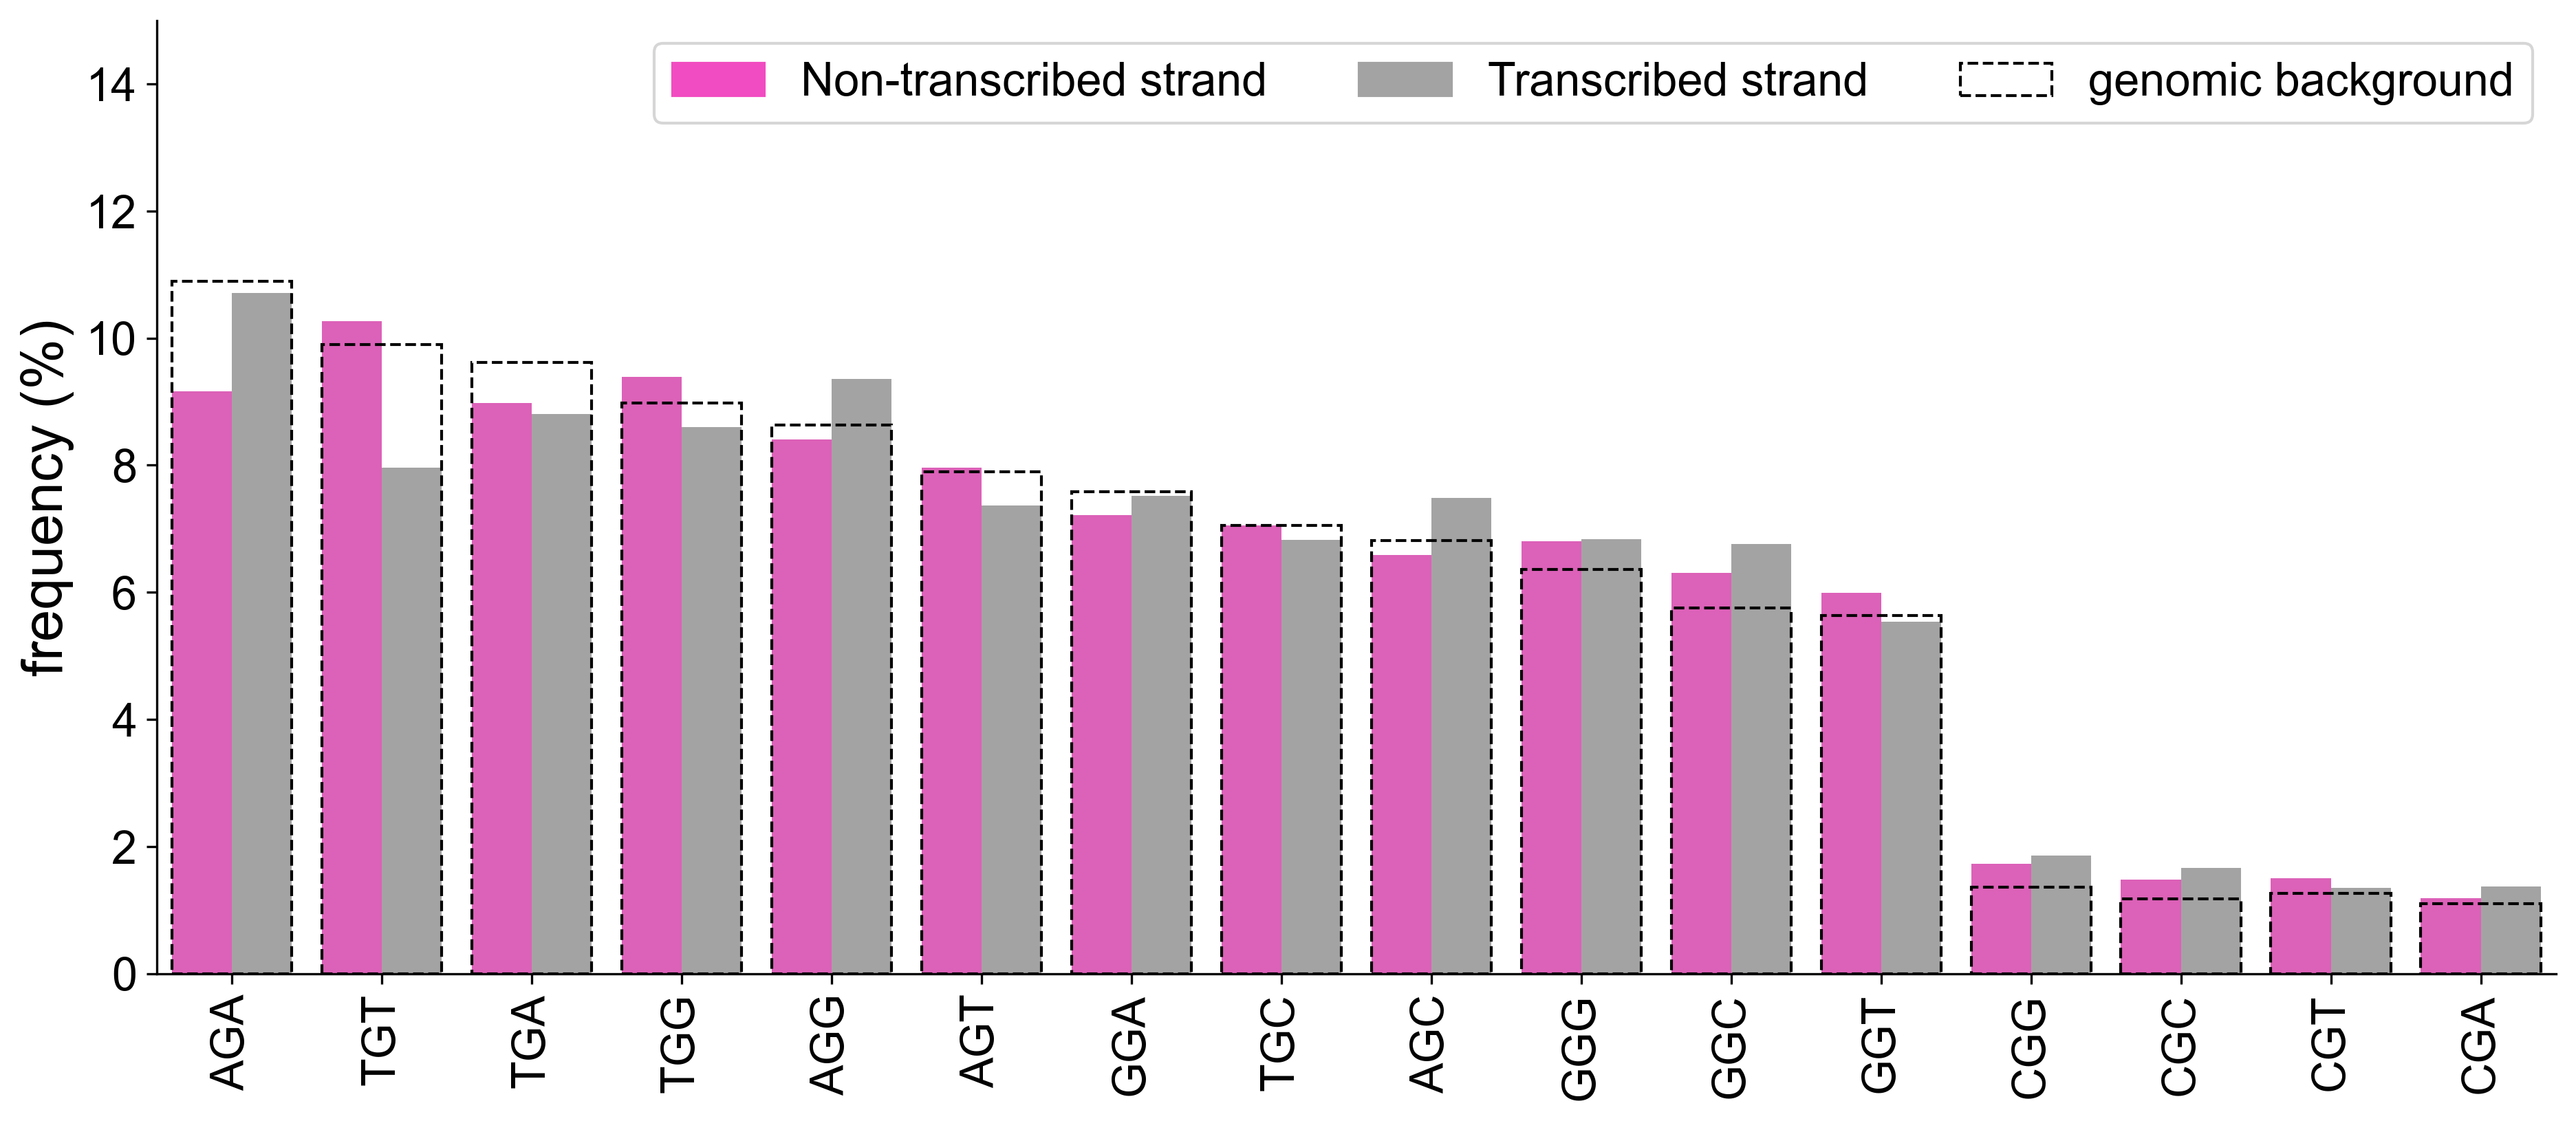

In [25]:
# Create the figure and axis
f, ax = plt.subplots(figsize=(15,6), dpi=300)

# Plot the barplot with samples averaged by conditions
sns.barplot(
    data=high_gene_counts, 
    x='Trinucleotide', order = triplet_order,
    y='rel_counts', 
    hue='Strand', 
    errorbar=None, 
    palette=[sns.color_palette("bright")[6], sns.color_palette("bright")[7]], 
    capsize=0.1, 
    err_kws={'color': 'black'}
)

# Plot the barplot for the genome background
sns.barplot(
    data=genomic_all_triplets, 
    x='index', order = triplet_order,
    y='rel_genomic_counts', 
    fill=False, 
    linestyle="dashed",
    linewidth=1,
    color='black', 
    label="Genome background"
)

# Customize the plot
sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylabel('frequency (%)', fontsize=20)
ax.set_xlabel('')
ax.set_ylim(0, 15)

# make legend
dashed = mpatches.Patch(fill=False, linestyle = "dashed", label='genomic background')

violet = mpatches.Patch(color=sns.color_palette("bright")[6], label='Non-transcribed strand')
grey = mpatches.Patch(color=sns.color_palette("bright")[7], label='Transcribed strand')


ax.legend(handles=[violet, grey, dashed], 
          ncol=7, loc='upper right')

plt.savefig(graph_path + 'triplets_highly_expr_genes.png', bbox_inches='tight')

## Compare with unexpressed genes

In [26]:
def bounds_of_groups(DATA1, perc_list):
    #perc_list - sorted increasing list of upper-border percentiles
    
    tmp = DATA1.loc[DATA1["Expression_level"] != 0, ["Gene", "Expression_level"]].copy().drop_duplicates()
    expr_array = np.array(tmp["Expression_level"])
    #print(len(expr_array))
    
    if np.max(expr_array) != np.percentile(expr_array, 100):
        print("Warning!")
    
    bounds = [(-1, 0)]
    prev_value = 0
    
    for p in perc_list:
        p_value = np.percentile(expr_array, p)
        
        bounds.append((prev_value, p_value))
        prev_value = p_value
    
    bins = pd.IntervalIndex.from_tuples(bounds)
    return(bins)
    

In [27]:
Gene_groups = pd.read_csv(data_path + "average_norm_data_prot_coding_genes.csv", index_col = 0)
Gene_groups = Gene_groups.loc[:, ["Gene", "Expression_level"]].drop_duplicates().reset_index(drop = True)
print(Gene_groups.shape[0])

groups = ['unexpr', '≤ 10%', '≤ 20%', '≤ 30%', '≤ 40%', '≤ 50%', '≤ 60%', '≤ 70%', '≤ 80%', '≤ 90%', '≤ 100%']
perc_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

bins = bounds_of_groups(Gene_groups, perc_list)
d = dict(zip(bins, groups))
print(d)
Gene_groups.loc[:, "Group"] = pd.cut(Gene_groups["Expression_level"], bins, include_lowest = True).map(d)

Gene_groups.groupby(by = ["Group"]).size().reset_index()
Gene_groups

16293
{Interval(-1.0, 0.0, closed='right'): 'unexpr', Interval(0.0, 0.0840642647884745, closed='right'): '≤ 10%', Interval(0.0840642647884745, 0.4329594072761063, closed='right'): '≤ 20%', Interval(0.4329594072761063, 1.6182386555954549, closed='right'): '≤ 30%', Interval(1.6182386555954549, 2.835519674737333, closed='right'): '≤ 40%', Interval(2.835519674737333, 3.6229303509201767, closed='right'): '≤ 50%', Interval(3.6229303509201767, 4.238175386177999, closed='right'): '≤ 60%', Interval(4.238175386177999, 4.840463233869542, closed='right'): '≤ 70%', Interval(4.840463233869542, 5.491083445159572, closed='right'): '≤ 80%', Interval(5.491083445159572, 6.466757562599958, closed='right'): '≤ 90%', Interval(6.466757562599958, 13.099199850954731, closed='right'): '≤ 100%'}


/scratch/tmp.12618498.jabueche/ipykernel_378229/3668033282.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Gene_groups.groupby(by = ["Group"]).size().reset_index()


Gene  Expression_level   Group
0      ENSG00000000460          5.012122   ≤ 80%
1      ENSG00000001461          4.952334   ≤ 80%
2      ENSG00000007933          0.000000  unexpr
3      ENSG00000008118          0.137504   ≤ 20%
4      ENSG00000009709          0.000000  unexpr
...                ...               ...     ...
16288  ENSG00000278057          0.000000  unexpr
16289  ENSG00000278085          0.000000  unexpr
16290  ENSG00000278289          0.000000  unexpr
16291  ENSG00000283093          0.000000  unexpr
16292  ENSG00000283697          0.042644   ≤ 10%

[16293 rows x 3 columns]

In [28]:
gene_trinucl_ref_genome_expr = pd.merge(gene_trinucl_ref_genome, Gene_groups, on='Gene')
gene_trinucl_ref_genome_expr

Gene Trinucleotide_count_in_ref_genome Trinucleotide  \
0       ENSG00000000460                              1372           TGT   
1       ENSG00000001461                              1122           TGT   
2       ENSG00000007933                               550           TGT   
3       ENSG00000008118                               519           TGT   
4       ENSG00000009709                              2155           TGT   
...                 ...                               ...           ...   
514587  ENSG00000250479                                28           AGA   
514588  ENSG00000274252                                35           AGA   
514589  ENSG00000275793                                66           AGA   
514590  ENSG00000278195                               201           AGA   
514591  ENSG00000284194                                31           AGA   

           Strand  Expression_level   Group  
0           sense          5.012122   ≤ 80%  
1           sense          4.952334   ≤ 80%  
2           sense          0.000000  unexpr  
3           sense          0.137504   ≤ 20%  
4           sense          0.000000  unexpr  
...           ...               ...     ...  
514587  antisense          3.565597   ≤ 50%  
514588  antisense          0.000000  unexpr  
514589  antisense          0.378512   ≤ 20%  
514590  antisense          0.014355   ≤ 10%  
514591  antisense          4.618826   ≤ 70%  

[514592 rows x 6 columns]

In [29]:
gene_trinucl_ref_genome_non_expr = gene_trinucl_ref_genome_expr[gene_trinucl_ref_genome_expr['Group'].isin({'unexpr'})]
gene_trinucl_ref_genome_non_expr

Gene Trinucleotide_count_in_ref_genome Trinucleotide  \
2       ENSG00000007933                               550           TGT   
4       ENSG00000009709                              2155           TGT   
8       ENSG00000010932                               709           TGT   
12      ENSG00000016602                               773           TGT   
13      ENSG00000018625                               466           TGT   
...                 ...                               ...           ...   
514560  ENSG00000189269                               578           AGA   
514564  ENSG00000198445                                32           AGA   
514573  ENSG00000215568                              1088           AGA   
514577  ENSG00000234965                                71           AGA   
514588  ENSG00000274252                                35           AGA   

           Strand  Expression_level   Group  
2           sense               0.0  unexpr  
4           sense               0.0  unexpr  
8           sense               0.0  unexpr  
12          sense               0.0  unexpr  
13          sense               0.0  unexpr  
...           ...               ...     ...  
514560  antisense               0.0  unexpr  
514564  antisense               0.0  unexpr  
514573  antisense               0.0  unexpr  
514577  antisense               0.0  unexpr  
514588  antisense               0.0  unexpr  

[74080 rows x 6 columns]

In [30]:
nonexpr_gene_tri_counts = gene_trinucl_ref_genome_non_expr.loc[:, ["Trinucleotide_count_in_ref_genome", "Trinucleotide", "Strand"]].copy()
nonexpr_gene_tri_counts = nonexpr_gene_tri_counts.groupby(by = ["Trinucleotide", "Strand"]).sum().reset_index()
nonexpr_gene_tri_counts

Trinucleotide     Strand Trinucleotide_count_in_ref_genome
0            AGA  antisense                           2004382
1            AGA      sense                           1883009
2            AGC  antisense                           1274032
3            AGC      sense                           1226466
4            AGG  antisense                           1623939
5            AGG      sense                           1593496
6            AGT  antisense                           1347099
7            AGT      sense                           1423322
8            CGA  antisense                            202374
9            CGA      sense                            194654
10           CGC  antisense                            221153
11           CGC      sense                            215525
12           CGG  antisense                            257911
13           CGG      sense                            255224
14           CGT  antisense                            222257
15           CGT      sense                            238462
16           GGA  antisense                           1410411
17           GGA      sense                           1400072
18           GGC  antisense                           1079430
19           GGC      sense                           1079569
20           GGG  antisense                           1223132
21           GGG      sense                           1249028
22           GGT  antisense                           1005822
23           GGT      sense                           1066672
24           TGA  antisense                           1697402
25           TGA      sense                           1736537
26           TGC  antisense                           1267063
27           TGC      sense                           1320126
28           TGG  antisense                           1613850
29           TGG      sense                           1697570
30           TGT  antisense                           1646584
31           TGT      sense                           1871500

In [31]:
gene_tri_counts_sense = nonexpr_gene_tri_counts[nonexpr_gene_tri_counts.Strand == 'sense'].copy()
gene_tri_counts_sense['rel_counts'] = gene_tri_counts_sense['Trinucleotide_count_in_ref_genome']/gene_tri_counts_sense['Trinucleotide_count_in_ref_genome'].sum()*100
print(gene_tri_counts_sense.rel_counts.sum())
gene_tri_counts_sense

100.00000000000001


Trinucleotide Strand Trinucleotide_count_in_ref_genome rel_counts
1            AGA  sense                           1883009  10.205329
3            AGC  sense                           1226466   6.647068
5            AGG  sense                           1593496   8.636258
7            AGT  sense                           1423322   7.713967
9            CGA  sense                            194654   1.054965
11           CGC  sense                            215525   1.168079
13           CGG  sense                            255224   1.383236
15           CGT  sense                            238462   1.292391
17           GGA  sense                           1400072   7.587959
19           GGC  sense                           1079569   5.850932
21           GGG  sense                           1249028   6.769347
23           GGT  sense                           1066672   5.781034
25           TGA  sense                           1736537   9.411496
27           TGC  sense                           1320126   7.154677
29           TGG  sense                           1697570   9.200307
31           TGT  sense                           1871500  10.142954

In [32]:
gene_tri_counts_anti = nonexpr_gene_tri_counts[nonexpr_gene_tri_counts.Strand == 'antisense'].copy()
gene_tri_counts_anti['rel_counts'] = gene_tri_counts_anti['Trinucleotide_count_in_ref_genome']/gene_tri_counts_anti['Trinucleotide_count_in_ref_genome'].sum()*100
print(gene_tri_counts_anti.rel_counts.sum())
gene_tri_counts_anti

100.00000000000001


Trinucleotide     Strand Trinucleotide_count_in_ref_genome rel_counts
0            AGA  antisense                           2004382  11.075867
2            AGC  antisense                           1274032    7.04008
4            AGG  antisense                           1623939   8.973605
6            AGT  antisense                           1347099   7.443835
8            CGA  antisense                            202374   1.118284
10           CGC  antisense                            221153   1.222053
12           CGG  antisense                            257911   1.425171
14           CGT  antisense                            222257   1.228154
16           GGA  antisense                           1410411   7.793686
18           GGC  antisense                           1079430   5.964743
20           GGG  antisense                           1223132   6.758815
22           GGT  antisense                           1005822   5.557998
24           TGA  antisense                           1697402   9.379549
26           TGC  antisense                           1267063    7.00157
28           TGG  antisense                           1613850   8.917855
30           TGT  antisense                           1646584   9.098737

In [33]:
unexpr_gene_counts = pd.concat([gene_tri_counts_sense, gene_tri_counts_anti])
unexpr_gene_counts

Trinucleotide     Strand Trinucleotide_count_in_ref_genome rel_counts
1            AGA      sense                           1883009  10.205329
3            AGC      sense                           1226466   6.647068
5            AGG      sense                           1593496   8.636258
7            AGT      sense                           1423322   7.713967
9            CGA      sense                            194654   1.054965
11           CGC      sense                            215525   1.168079
13           CGG      sense                            255224   1.383236
15           CGT      sense                            238462   1.292391
17           GGA      sense                           1400072   7.587959
19           GGC      sense                           1079569   5.850932
21           GGG      sense                           1249028   6.769347
23           GGT      sense                           1066672   5.781034
25           TGA      sense                           1736537   9.411496
27           TGC      sense                           1320126   7.154677
29           TGG      sense                           1697570   9.200307
31           TGT      sense                           1871500  10.142954
0            AGA  antisense                           2004382  11.075867
2            AGC  antisense                           1274032    7.04008
4            AGG  antisense                           1623939   8.973605
6            AGT  antisense                           1347099   7.443835
8            CGA  antisense                            202374   1.118284
10           CGC  antisense                            221153   1.222053
12           CGG  antisense                            257911   1.425171
14           CGT  antisense                            222257   1.228154
16           GGA  antisense                           1410411   7.793686
18           GGC  antisense                           1079430   5.964743
20           GGG  antisense                           1223132   6.758815
22           GGT  antisense                           1005822   5.557998
24           TGA  antisense                           1697402   9.379549
26           TGC  antisense                           1267063    7.00157
28           TGG  antisense                           1613850   8.917855
30           TGT  antisense                           1646584   9.098737

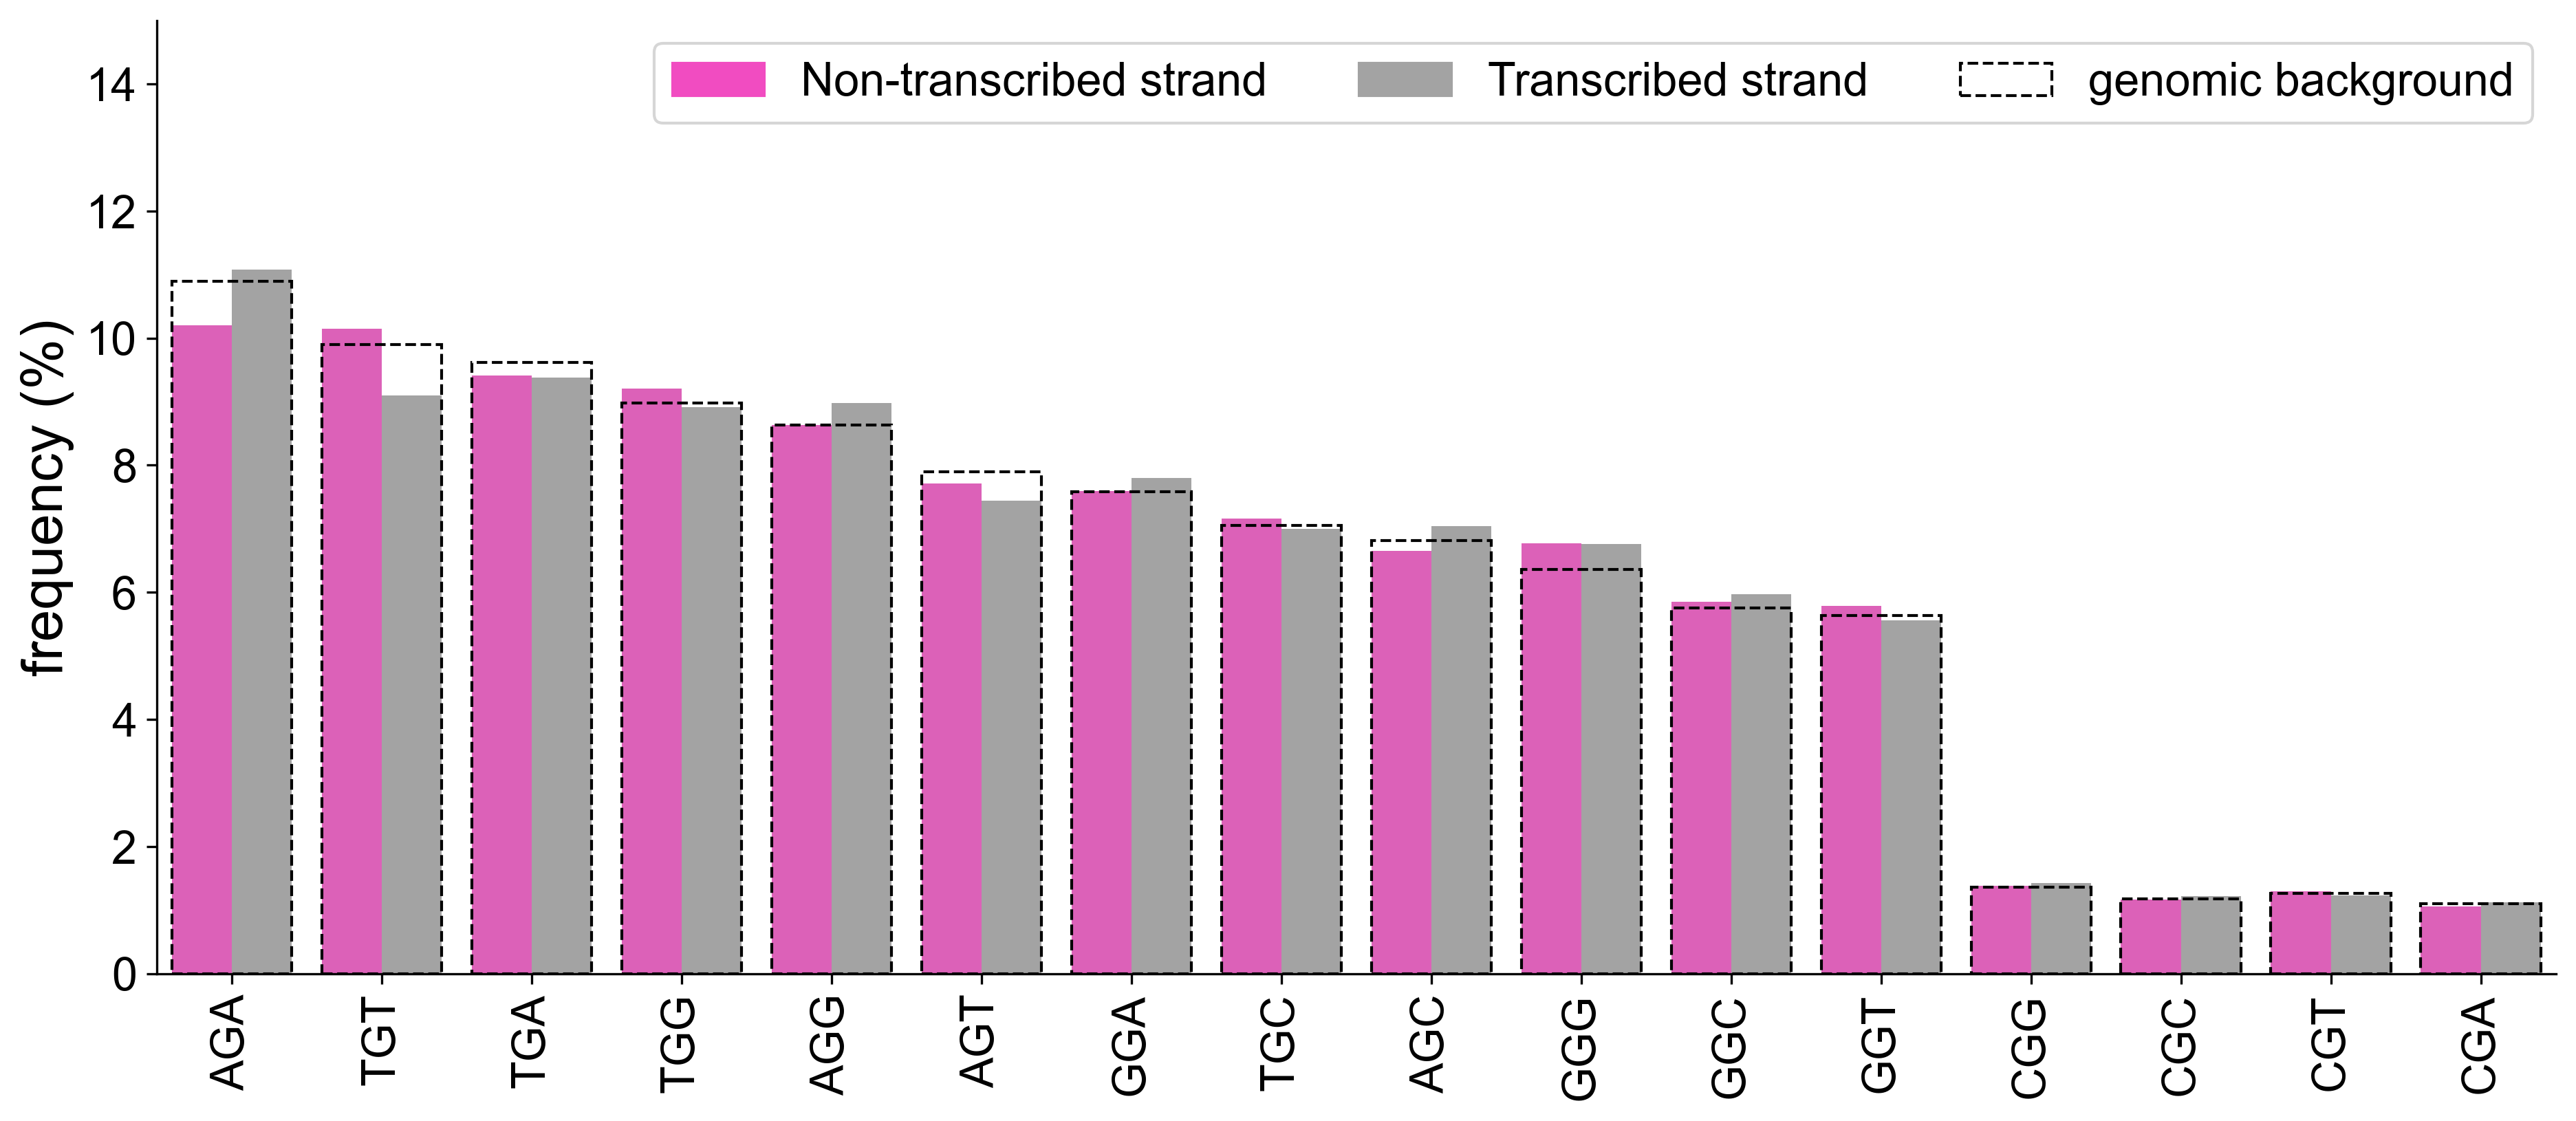

In [34]:
# Create the figure and axis
f, ax = plt.subplots(figsize=(15,6), dpi=300)

# Plot the barplot with samples averaged by conditions
sns.barplot(
    data=unexpr_gene_counts, 
    x='Trinucleotide', order = triplet_order,
    y='rel_counts', 
    hue='Strand', 
    errorbar=None, 
    palette=[sns.color_palette("bright")[6], sns.color_palette("bright")[7]], 
    capsize=0.1, 
    err_kws={'color': 'black'}
)

# Plot the barplot for the genome background
sns.barplot(
    data=genomic_all_triplets, 
    x='index', order = triplet_order,
    y='rel_genomic_counts', 
    fill=False, 
    linestyle="dashed",
    linewidth=1,
    color='black', 
    label="Genome background"
)

# Customize the plot
sns.despine()
plt.xticks(rotation='vertical')
ax.set_ylabel('frequency (%)', fontsize=20)
ax.set_xlabel('')
ax.set_ylim(0, 15)

# make legend
dashed = mpatches.Patch(fill=False, linestyle = "dashed", label='genomic background')

violet = mpatches.Patch(color=sns.color_palette("bright")[6], label='Non-transcribed strand')
grey = mpatches.Patch(color=sns.color_palette("bright")[7], label='Transcribed strand')


ax.legend(handles=[violet, grey, dashed], 
          ncol=7, loc='upper right')

plt.savefig(graph_path + 'triplets_non_expr_genes.png', bbox_inches='tight')

In [35]:
%pip list

Package                              Version
------------------------------------ ---------------------
absl-py                              2.1.0
addict                               2.4.0
aiofiles                             22.1.0
aiohttp                              3.9.5
aiosignal                            1.3.1
aiosqlite                            0.20.0
alembic                              1.13.1
annotated-types                      0.7.0
anyio                                4.4.0
appdirs                              1.4.4
argon2-cffi                          23.1.0
argon2-cffi-bindings                 21.2.0
argparse-dataclass                   2.0.0
arrow                                1.3.0
asttokens                            2.4.1
astunparse                           1.6.3
async-lru                            2.0.4
attrs                                23.2.0
Babel                                2.15.0
beautifulsoup4                       4.12.3
biopython                   